## 1. Data collection

In [93]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
price = []
company = []
model = []
kms = []
engine_type = []
location = []
year = []

for i in range(1,50):
    url = "https://www.cartrade.com/buy-used-cars/#so=-1&sc=-1&city="+str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)

    data = soup.find_all('div', class_="cr_prc")
    for i in data:
        a = i.text
        price.append(a.split()[0])
    

    data = soup.find_all('h2', class_="h2heading truncate")
    for i in data:
        a = i.text
        year.append(a.split()[0])
        company.append(a.split()[1])
        model.append(a.split()[2])

    data = soup.find_all('div', class_="info_cr_new")
    for i in data:
        a = i.text
        kms.append(a.split("|")[0])
        engine_type.append(a.split("|")[1])
        location.append(a.split("|")[2].split()[0])


In [95]:
d = {"Company":company,
     "Model":model,
     "Kms":kms,
     "Engine_type":engine_type,
     "Year":year,
     "Price":price,
     "Location":location}

In [96]:
df = pd.DataFrame(d)

In [97]:
df

,Company,Model,Kms,Engine_type,Year,Price,Location
0,Hyundai,Grand,"46,690 KMs",Petrol,2017,"₹4,41,000",Delhi
1,Mercedes-Benz,GLC,"54,583 KMs",Diesel,2019,"₹55,99,999",Hyderabad
2,Mercedes-Benz,GLA,"77,000 KMs",Petrol,2017,"₹21,00,000",Hyderabad
3,Hyundai,Grand,"36,000 KMs",Petrol,2016,"₹5,65,000",Mumbai
4,Honda,City,"95,000 KMs",Petrol,2010,"₹3,10,000",Mumbai
...,...,...,...,...,...,...,...
1560,MG,Hector,"20,256 KMs",Petrol,2021,"₹19,99,000",Bangalore
1561,Toyota,Innova,"55,836 KMs",Diesel,2018,"₹21,99,000",Bangalore
1562,Kia,Seltos,"55,441 KMs",Petrol,2019,"₹13,99,000",Bangalore
1563,Maruti,Suzuki,"17,036 KMs",Petrol,2021,"₹8,59,000",Bangalore


In [98]:
df.head(5)

,Company,Model,Kms,Engine_type,Year,Price,Location
0,Hyundai,Grand,"46,690 KMs",Petrol,2017,"₹4,41,000",Delhi
1,Mercedes-Benz,GLC,"54,583 KMs",Diesel,2019,"₹55,99,999",Hyderabad
2,Mercedes-Benz,GLA,"77,000 KMs",Petrol,2017,"₹21,00,000",Hyderabad
3,Hyundai,Grand,"36,000 KMs",Petrol,2016,"₹5,65,000",Mumbai
4,Honda,City,"95,000 KMs",Petrol,2010,"₹3,10,000",Mumbai


In [99]:
df.tail(5)

,Company,Model,Kms,Engine_type,Year,Price,Location
1560,MG,Hector,"20,256 KMs",Petrol,2021,"₹19,99,000",Bangalore
1561,Toyota,Innova,"55,836 KMs",Diesel,2018,"₹21,99,000",Bangalore
1562,Kia,Seltos,"55,441 KMs",Petrol,2019,"₹13,99,000",Bangalore
1563,Maruti,Suzuki,"17,036 KMs",Petrol,2021,"₹8,59,000",Bangalore
1564,Renault,Duster,"28,566 KMs",Petrol,2021,"₹10,99,000",Bangalore


In [100]:
df.to_csv("used cars data_csv")

## 2. Data cleaning

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      1565 non-null   object
 1   Model        1565 non-null   object
 2   Kms          1565 non-null   object
 3   Engine_type  1565 non-null   object
 4   Year         1565 non-null   object
 5   Price        1565 non-null   object
 6   Location     1565 non-null   object
dtypes: object(7)
memory usage: 85.7+ KB


In [102]:
df.describe().T

,count,unique,top,freq
Company,1565,27,Maruti,362
Model,1565,100,Suzuki,362
Kms,1565,255,"55,441 KMs",49
Engine_type,1565,6,Petrol,1232
Year,1565,16,2021,333
Price,1565,227,"₹5,49,000",148
Location,1565,41,Bangalore,666


In [103]:
df["Kms"] = [re.sub(r"[^\d+]","",i) for i in df['Kms'] ]
df['Kms'] = df['Kms'].astype("int")
df["Year"] = df['Year'].astype("int")
df["Price"] = [re.sub(r"[^\d+]","",i) for i in df['Price'] ]
df["Price"] = df['Price'].astype("int")

In [104]:
df

,Company,Model,Kms,Engine_type,Year,Price,Location
0,Hyundai,Grand,46690,Petrol,2017,441000,Delhi
1,Mercedes-Benz,GLC,54583,Diesel,2019,5599999,Hyderabad
2,Mercedes-Benz,GLA,77000,Petrol,2017,2100000,Hyderabad
3,Hyundai,Grand,36000,Petrol,2016,565000,Mumbai
4,Honda,City,95000,Petrol,2010,310000,Mumbai
...,...,...,...,...,...,...,...
1560,MG,Hector,20256,Petrol,2021,1999000,Bangalore
1561,Toyota,Innova,55836,Diesel,2018,2199000,Bangalore
1562,Kia,Seltos,55441,Petrol,2019,1399000,Bangalore
1563,Maruti,Suzuki,17036,Petrol,2021,859000,Bangalore


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Company      1565 non-null   object
 1   Model        1565 non-null   object
 2   Kms          1565 non-null   int32 
 3   Engine_type  1565 non-null   object
 4   Year         1565 non-null   int32 
 5   Price        1565 non-null   int32 
 6   Location     1565 non-null   object
dtypes: int32(3), object(4)
memory usage: 67.4+ KB


In [106]:
df.isnull().sum()

Company        0
Model          0
Kms            0
Engine_type    0
Year           0
Price          0
Location       0
dtype: int64

In [107]:
df.duplicated(subset = ['Company', 'Model', 'Kms', 'Engine_type', 'Year', 'Price', 'Location'], keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
1560     True
1561     True
1562     True
1563     True
1564     True
Length: 1565, dtype: bool

In [108]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,Company,Model,Kms,Engine_type,Year,Price,Location
0,Hyundai,Grand,46690,Petrol,2017,441000,Delhi
1,Mercedes-Benz,GLC,54583,Diesel,2019,5599999,Hyderabad
2,Mercedes-Benz,GLA,77000,Petrol,2017,2100000,Hyderabad
3,Hyundai,Grand,36000,Petrol,2016,565000,Mumbai
4,Honda,City,95000,Petrol,2010,310000,Mumbai
...,...,...,...,...,...,...,...
1501,Maruti,Suzuki,30091,CNG + 1,2020,549000,Delhi
1502,Honda,WR-V,26100,Petrol,2018,775000,Delhi
1504,Jaguar,XF,49367,Diesel,2018,3999999,Hyderabad
1537,Kia,Seltos,57592,Petrol,2019,1490000,Chennai


In [109]:
duplicate_bool = df.duplicated(subset=['Company', 'Model', 'Kms', 'Engine_type', 'Year', 'Price', 'Location'], keep='first')
df = df.loc[duplicate_bool == True]

In [110]:
df

,Company,Model,Kms,Engine_type,Year,Price,Location
40,Renault,Kwid,13994,Petrol,2022,549000,Mangalore
41,Maruti,Suzuki,13705,Petrol,2020,529000,Mangalore
42,Maruti,Suzuki,39012,Petrol,2018,565000,Mangalore
43,Hyundai,Grand,32639,Petrol,2020,699000,Mangalore
44,Renault,Kiger,37167,Petrol,2021,929000,Bangalore
...,...,...,...,...,...,...,...
1560,MG,Hector,20256,Petrol,2021,1999000,Bangalore
1561,Toyota,Innova,55836,Diesel,2018,2199000,Bangalore
1562,Kia,Seltos,55441,Petrol,2019,1399000,Bangalore
1563,Maruti,Suzuki,17036,Petrol,2021,859000,Bangalore


In [111]:
df.shape

(1282, 7)

## 3. Data visualisation

C:\Users\Donuri shekar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


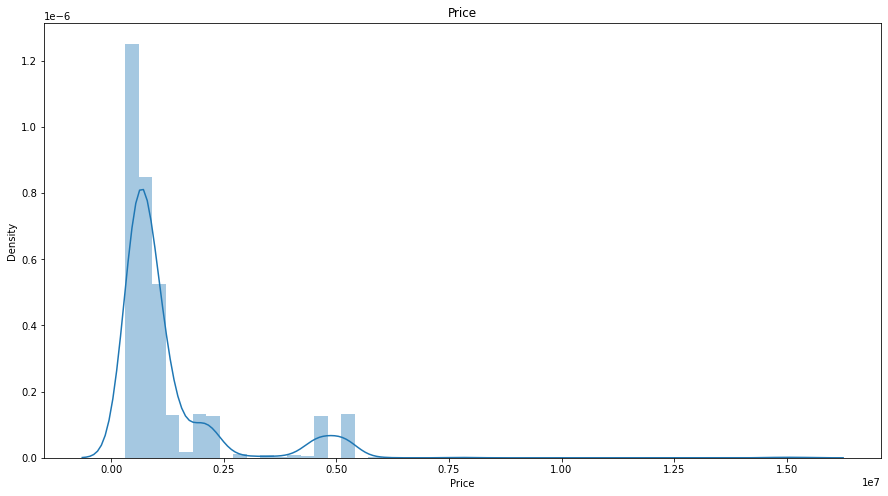

In [112]:
plt.figure(figsize = (15,8))
sns.distplot(df['Price'], kde=True)
plt.title("Price")
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

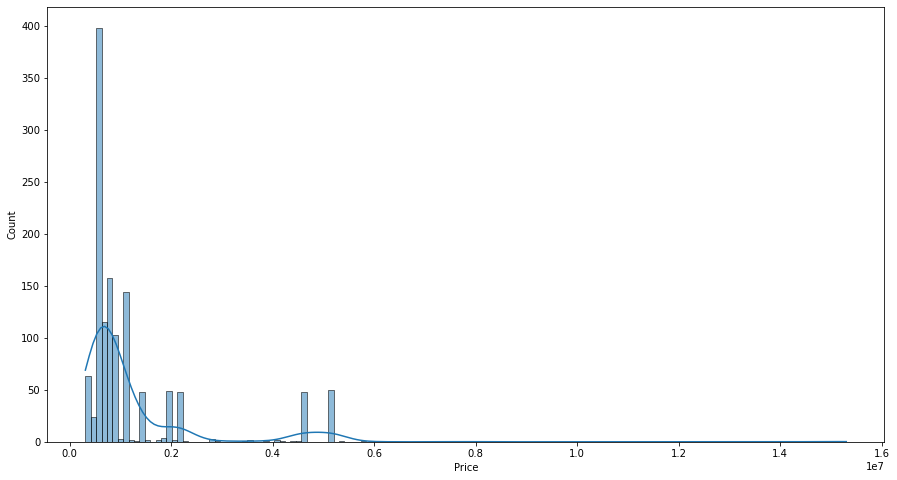

In [113]:
plt.figure(figsize = (15,8))
sns.histplot(data = df, x=  df['Price'], kde = True)

In [114]:
df1 = df.sort_values(by = ['Price','Location'],ascending = False).head(10)
df1

,Company,Model,Kms,Engine_type,Year,Price,Location
1092,Mercedes-Benz,S-Class,5000,Diesel,2022,15300000,Delhi
1533,Mercedes-Benz,GLS,14753,Diesel,2022,14799999,Hyderabad
1187,Mercedes-Benz,GLB,2400,Diesel,2022,7800000,Hyderabad
676,BMW,X5,52784,Diesel,2017,5775000,Bangalore
1277,Audi,Q5,33173,Diesel,2019,5400000,Bangalore
320,BMW,5,39500,Diesel,2020,5175000,Chandigarh
1309,BMW,5,39500,Diesel,2020,5175000,Chandigarh
53,Land,Rover,39426,Diesel,2018,5150000,Bangalore
85,Land,Rover,39426,Diesel,2018,5150000,Bangalore
117,Land,Rover,39426,Diesel,2018,5150000,Bangalore


- Top 10 prices vs location

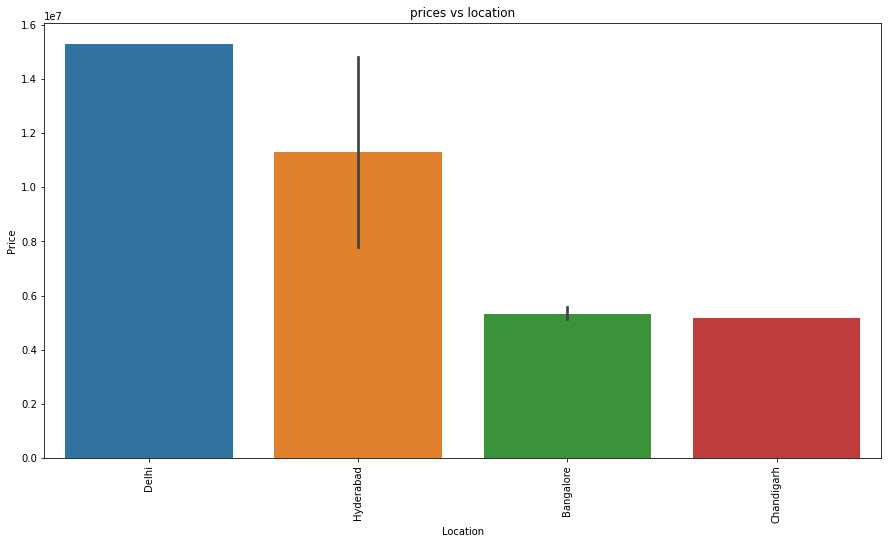

In [128]:
plt.figure(figsize = (15,8))
sns.barplot(x="Location", y="Price", data=df1)
plt.title("prices vs location")
plt.xticks(rotation=90)
plt.show()

- Top 10 companies vs price

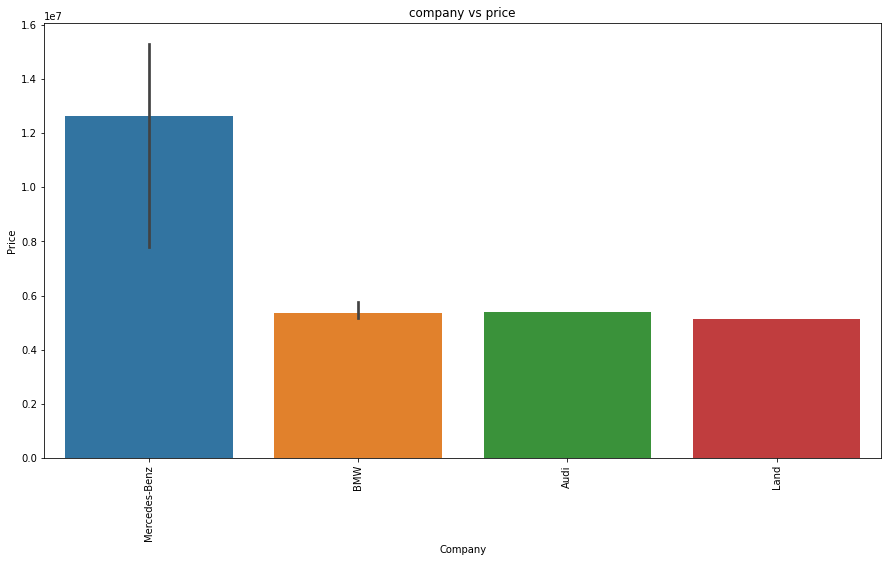

In [127]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Company',
            y = 'Price',
            data = df1)
plt.xticks(rotation = 90)
plt.title('company vs price')
plt.show()

- Year wise price variaton in cars

No handles with labels found to put in legend.


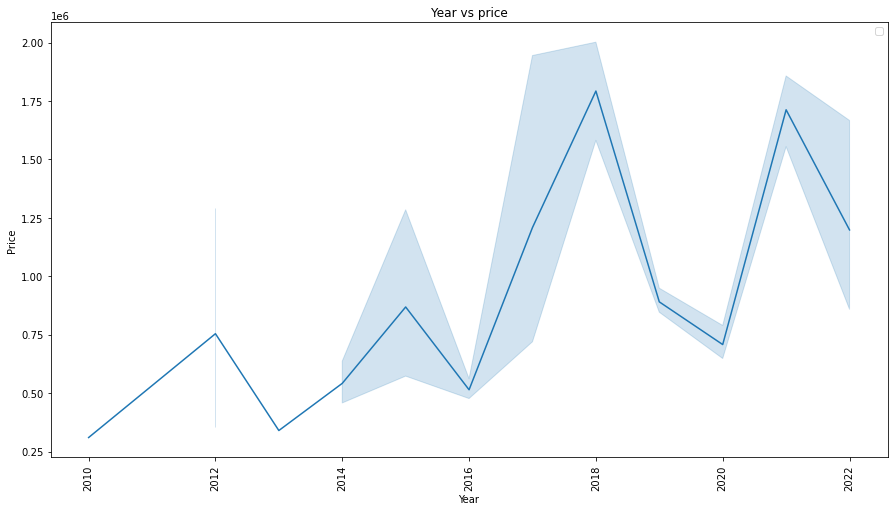

In [119]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Year',
            y = 'Price',
            data = df)
plt.xticks(rotation = 90)
plt.legend()
plt.title('Year vs price')
plt.show()

- companies with count of cars

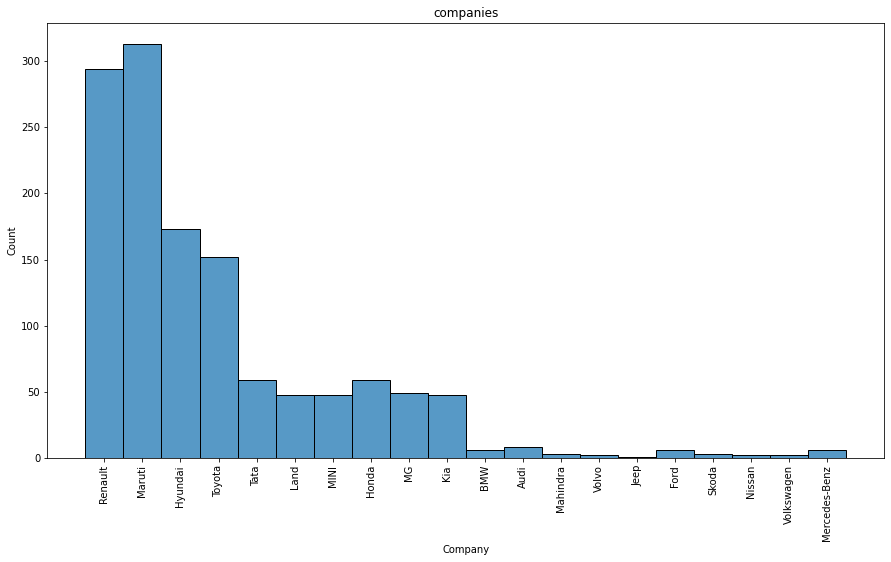

In [120]:
plt.figure(figsize = (15,8))
sns.histplot(x = 'Company', data = df)
plt.xticks(rotation = 90)
plt.title("companies")
plt.show()

In [121]:
df["Engine_type"].value_counts()

Petrol        1081
Diesel         189
CNG              8
Petrol + 1       4
Name: Engine_type, dtype: int64

- percentage of engine_type in cars

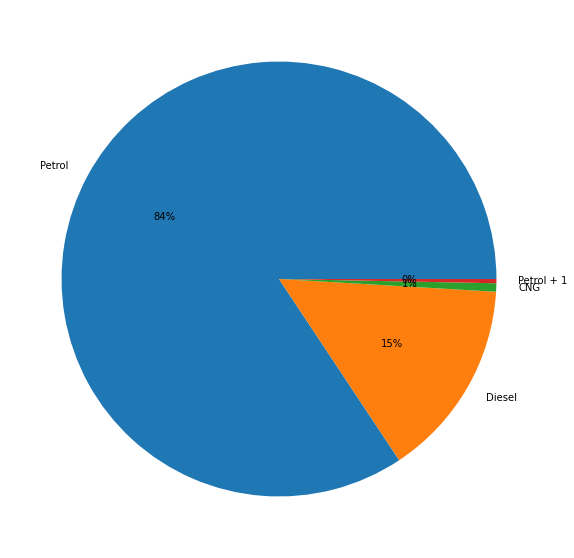

In [122]:
plt.figure(figsize=(15,10))
plt.pie(df["Engine_type"].value_counts(), 
        labels = df["Engine_type"].unique(), 
        autopct='%0.0f%%')
plt.show()

- outliers in price of cars

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

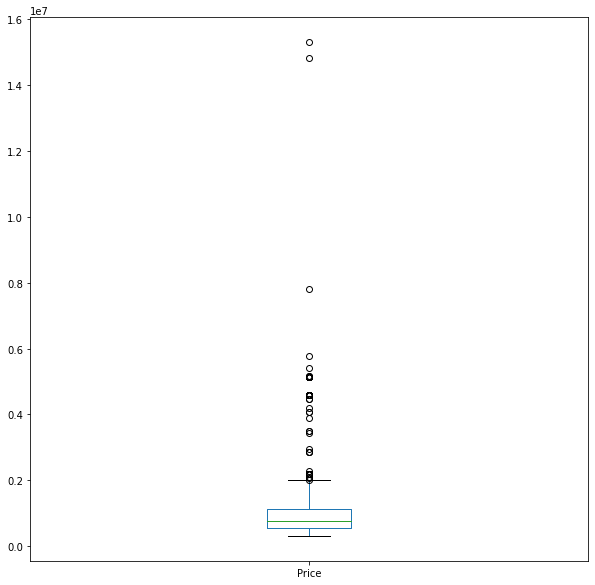

In [124]:
plt.figure(figsize = (10,10))
df['Price'].plot(kind='box')
plt.show()

- heatmap

<AxesSubplot:>

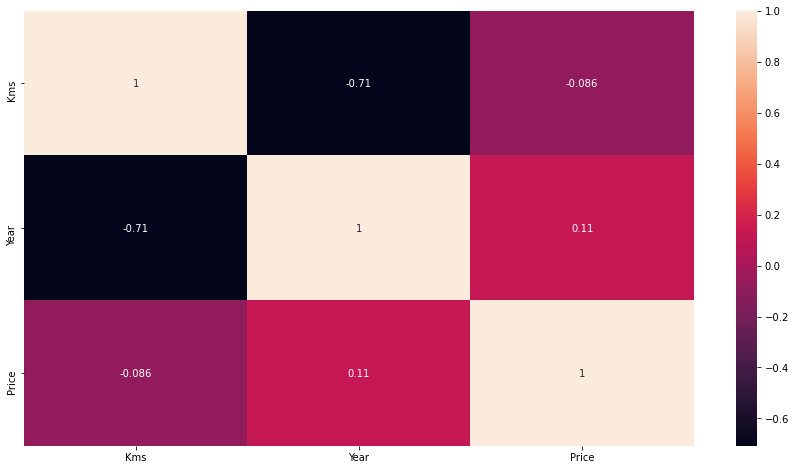

In [125]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True)